# Spatial Analysis

SpatialTis provides a series of Spatial Anlaysis methods:

- **Find cell neighbors**
- **Neighbor dependent markers**

Cell type based analysis:

- Spatial Distribution*
- Spatial Heterogenenity*
- Hotspot Detection*
- Neighborhood Analyisis (Cell-Cell Interaction)

\* No need to compute neighbors information

**Markers based analysis**:

- **Spatial Enrichment Analysis (Markers spatial enrichemnt)**
- **Spatial Co-expression**
- **Spatial community detection**


In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import anndata as ad
data = ad.read_h5ad("../data/imc_data.h5ad")
data

AnnData object with n_obs × n_vars = 1776974 × 38
    obs: 'area', 'eccentricity', 'islet_id', 'centroid', 'image', 'case', 'slide', 'part', 'group', 'stage', 'cell_cat', 'cell_type'
    var: 'markers'

In [3]:
import spatialtis as st
import spatialtis.plotting as sp
from spatialtis import CONFIG

CONFIG.EXP_OBS = ["stage", "case", "part", "image"] 
CONFIG.CELL_TYPE_KEY = "cell_type" 
CONFIG.MARKER_KEY = "markers"
CONFIG.CENTROID_KEY = "centroid"

In [4]:
selected_markers=["INS","CD38","CD44","PCSK2","CD99","CD68","MPO","SLC2A1",
"CD20","AMY2A","CD3e","PPY","PIN","GCG","PDX1","SST","SYP","KRT19",
"CD45","FOXP3","CD45RA","CD8a","IAPP","NKX6-1","CD4","PTPRN","cCASP3"]

In [5]:
st.find_neighbors(data, expand=8)

Find neighbors ██████████ 100% 00:00|00:14


## Sptial enrichment analysis

This is very similar to neighborhood analysis, to profile the interaction between markers

In [6]:
st.spatial_enrichment_analysis(data, selected_markers=selected_markers)

Spatial enrichment analysis ██████████ 100% 00:00|13:43


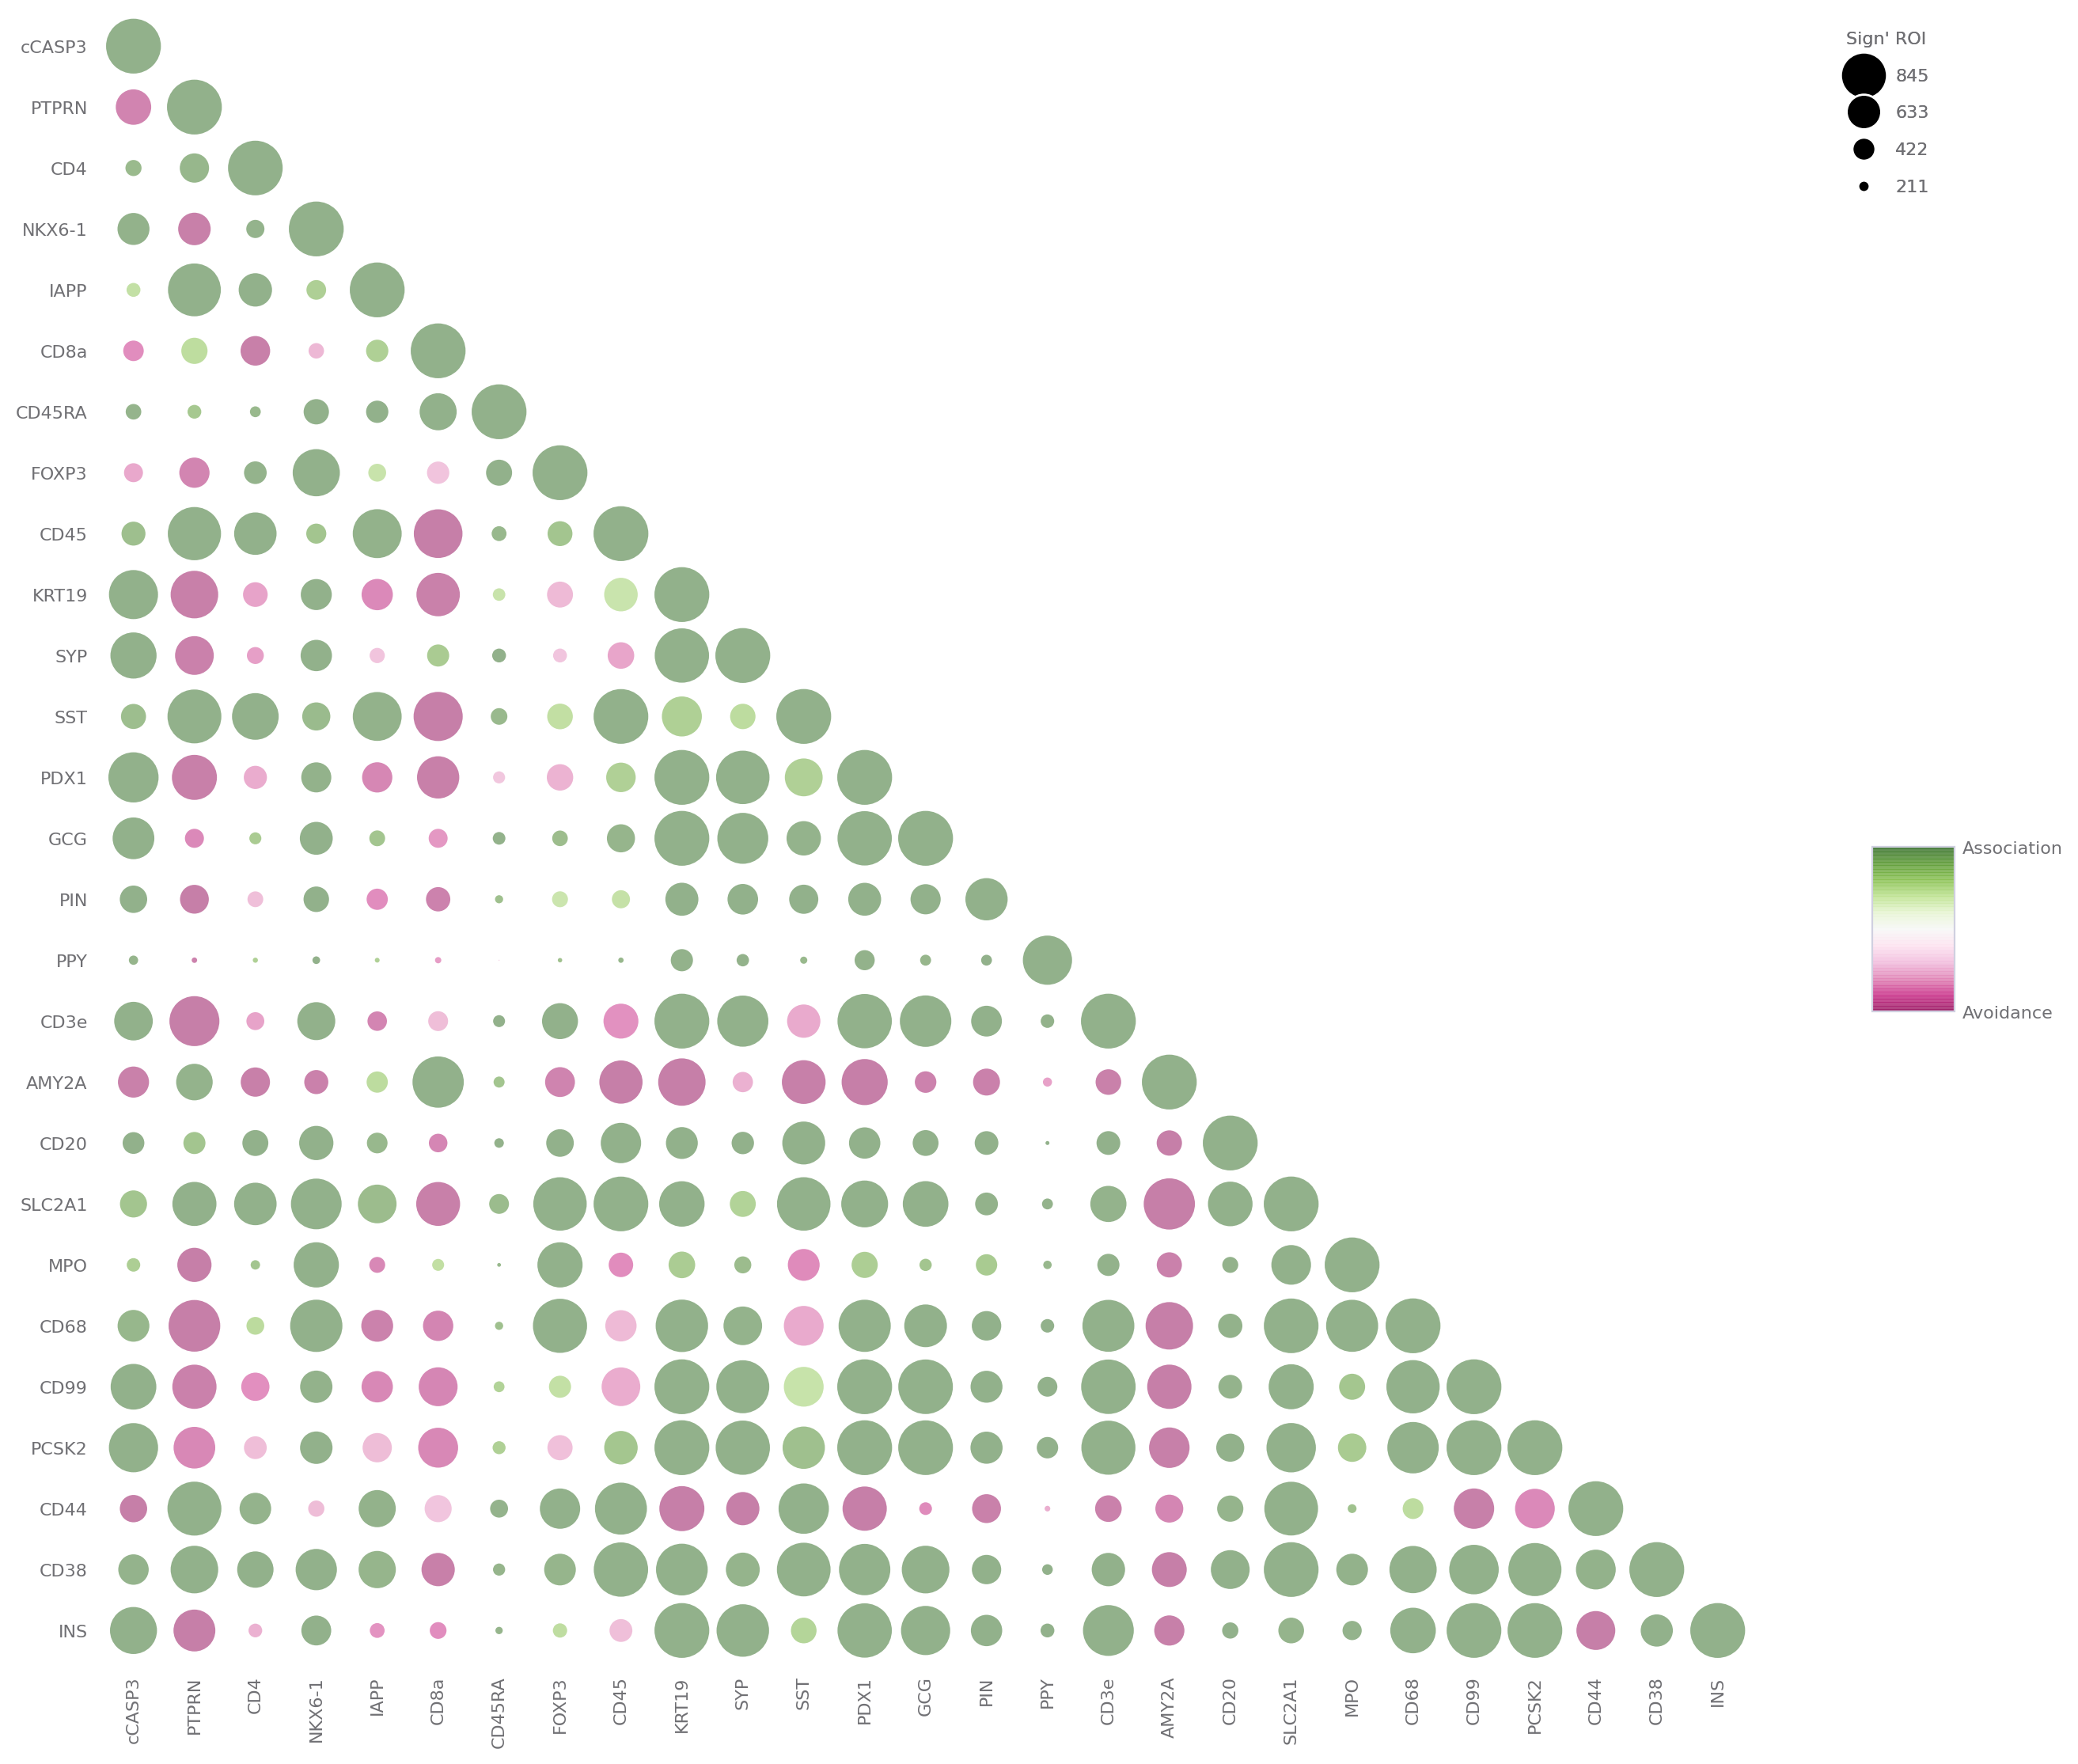

In [7]:
sp.spatial_enrichment_analysis(data)

## Spatial Co-expression

In [8]:
st.spatial_co_expression(data, 
                         selected_markers=selected_markers, 
                         use_cell_type=True,
                         exp_std_cutoff=2.0,
                         corr_cutoff=0.99
                        )

(pid=3248) /Users/milk/anaconda3/envs/spatialtis/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
(pid=3248)   ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
(pid=3248) /Users/milk/anaconda3/envs/spatialtis/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
(pid=3248)   arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
(pid=3248) /Users/milk/anaconda3/envs/spatialtis/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in true_divide
(pid=3248)   ret = ret.dtype.type(ret / rcount)


co-expression ██████████ 100% 00:00|00:00


In [9]:
sp.spatial_co_expression(data, selected_markers=selected_markers, use="graph_interactive", layout="circular").render()

## Community detection

Please refer to **ROI visualization**

## Neighbor cell depedent markers

In [10]:
st.NCDMarkers(data, use_cell_type=True, selected_markers=selected_markers)

NCD Markers ██████████ 100% 00:00|00:35


In [11]:
df = st.get_result(data, 'ncd_markers')
df = df[(~df['cell_type'].isin(["unknown", "otherimmune"])) & (~df['neighbor_type'].isin(["unknown", "otherimmune"]))].reset_index(drop=True)
df = df[(df['log2_FC'] > 2) | (df['log2_FC'] < -2)].sort_values('log2_FC', ascending=False)
df

,cell_type,marker,neighbor_type,dependency,log2_FC,pvalue
5,acinar,PPY,gamma,0.979232,9.197886,7.698006e-135
7,alpha,PPY,gamma,0.986381,7.996292,2.658439e-55
16,ductal,PPY,gamma,0.987338,7.530525,9.438925e-65
19,endothelial,PPY,gamma,0.989310,7.259280,2.422572e-17
13,delta,PPY,gamma,0.966832,6.299237,2.490482e-63
20,endothelial,PIN,beta,0.952361,4.528741,2.386312e-82
0,Tc,PCSK2,alpha,0.623686,4.231225,5.131627e-79
23,macrophage,PCSK2,alpha,0.624294,4.070839,7.595857e-32
1,Tc,MPO,neutrophil,0.567589,3.889900,1.999182e-68
3,Th,MPO,neutrophil,0.573156,3.352362,1.773463e-38


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

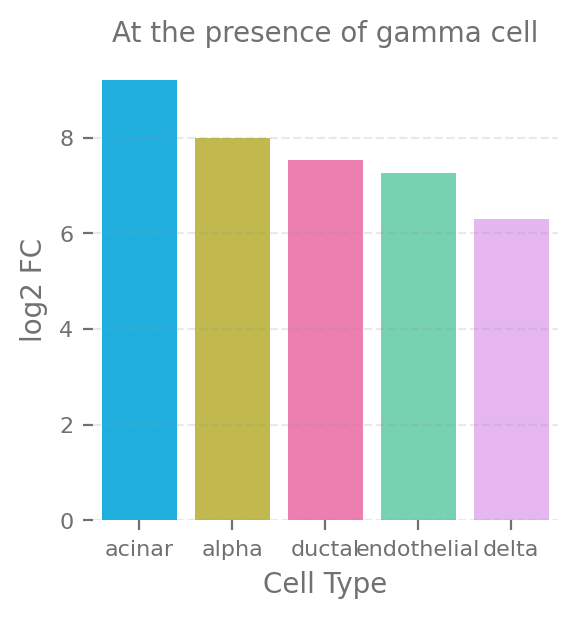

In [13]:
fig, ax = plt.subplots(figsize=(3, 3))
sns.barplot(data=df[df['neighbor_type'] == 'gamma'], y="log2_FC", x="cell_type", ax=ax)
ax.set(title="At the presence of gamma cell", xlabel="Cell Type", ylabel="log2 FC")
plt.show()

In [14]:
st.NMDMarkers(data, selected_markers=selected_markers)

NMD Markers ██████████ 100% 00:00|00:47


In [15]:
st.get_result(data, 'nmd_markers')

,marker,neighbor_marker,dependency,corr,pvalue
0,CD44,CD44,0.814981,0.508253,0.0
1,PCSK2,PCSK2,0.739240,0.527866,0.0
2,CD99,CD99,0.893133,0.587406,0.0
3,MPO,MPO,0.390161,0.201208,0.0
4,SLC2A1,SLC2A1,0.473799,0.444032,0.0
5,PPY,PPY,0.555188,0.213360,0.0
6,PIN,PIN,0.767584,0.316015,0.0
7,PDX1,PDX1,0.748424,0.352411,0.0
8,SST,SST,0.806502,0.525266,0.0
9,KRT19,KRT19,0.871854,0.561561,0.0
